In [2]:
import os
importm pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import seaborn as sns ; sns.set()

In [3]:
pwd

'c:\\Users\\WINNER\\Documents\\workspace folder 2'

In [4]:
FILE_NAME = "Tesco.csv"
DATA_FOLDER = "data"

In [5]:
main_path = os.getcwd()
main_path

'c:\\Users\\WINNER\\Documents\\workspace folder 2'

In [6]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)

In [7]:
file_path

'c:\\Users\\WINNER\\Documents\\workspace folder 2\\data\\Tesco.csv'

In [8]:
%%time

tesco_data = pd.read_csv(file_path)

Wall time: 49.4 ms


# DATA INSPECTION

In [9]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# CLASSIFICATION PROBLEM - LOGISTIC REGRESSION

In [10]:
tesco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
tesco_data.shape

(7043, 21)

In [11]:
tesco_data.tail

<bound method NDFrame.tail of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

# Exploratory Data Analysis (EDA) 


PLOTS, CORRELATION

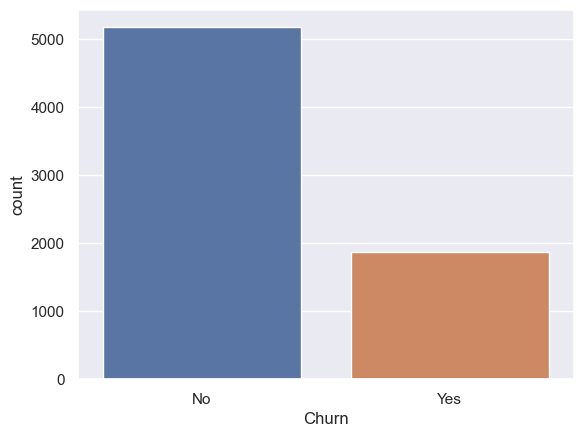

In [12]:
sns.countplot(x='Churn',data=tesco_data)
plt.show()

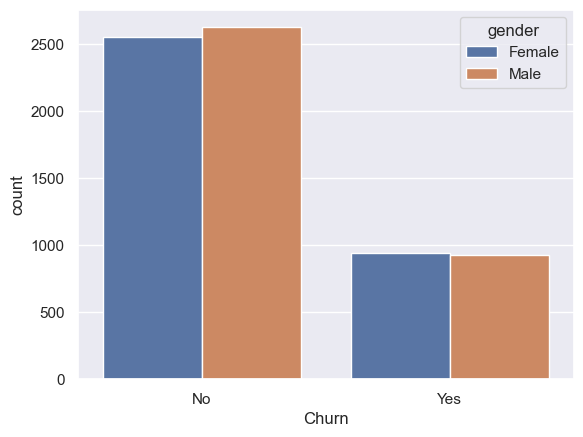

In [13]:
# count plot churn and gender
sns.countplot(x='Churn',hue='gender',data=tesco_data)
plt.show()

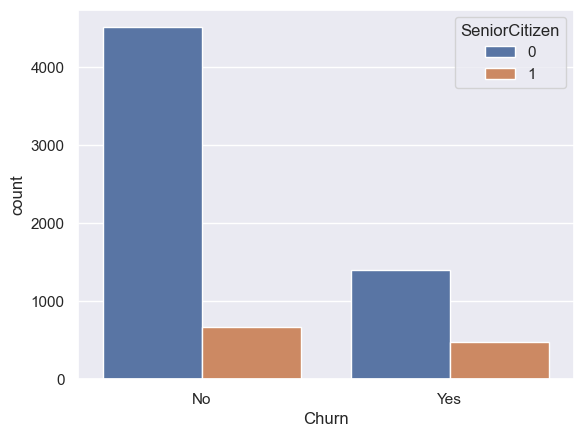

In [14]:
# count plot churn and SeniorCitizen
sns.countplot(x='Churn',hue='SeniorCitizen',data=tesco_data)
plt.show()

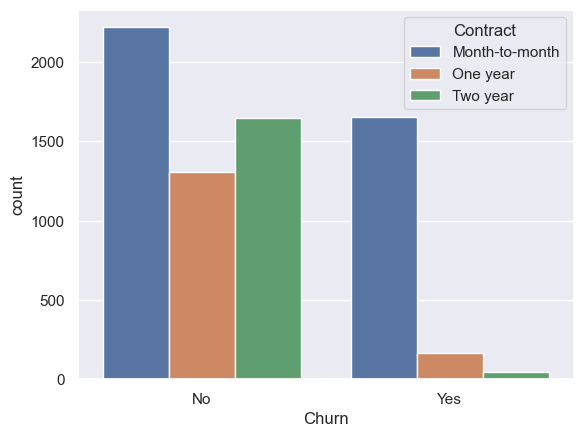

In [15]:
# count plot churn and Contract
sns.countplot(x='Churn',hue='Contract',data=tesco_data)
plt.show()

# MODEL BUILDING 

In [61]:
# mapping yes and no value these colums Partner,Dependents,PhoneService
yes_no_mapping = {'Yes':1,'No':0}
tesco_data['Partner'] = tesco_data['Partner'].map(yes_no_mapping)
tesco_data['Dependents'] = tesco_data['Dependents'].map(yes_no_mapping)
tesco_data['PhoneService'] = tesco_data['PhoneService'].map(yes_no_mapping)

In [62]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# mapping yes and no value these colums OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,StreamingTV


In [64]:
internet_service_mapping = {'Yes':1,'No':0,'No internet service':0}
tesco_data['OnlineSecurity'] = tesco_data['OnlineSecurity'].map(internet_service_mapping)
tesco_data['OnlineBackup'] = tesco_data['OnlineBackup'].map(internet_service_mapping)
tesco_data['DeviceProtection'] = tesco_data['DeviceProtection'].map(internet_service_mapping)
tesco_data['TechSupport'] = tesco_data['TechSupport'].map(internet_service_mapping)
tesco_data['StreamingMovies'] = tesco_data['StreamingMovies'].map(internet_service_mapping)
tesco_data['StreamingTV'] = tesco_data['StreamingTV'].map(internet_service_mapping)

In [65]:
# mapping yes and no value these colums MultipleLines
phone_service_maping = {'Yes':1,'No':0,'No phone service' :0}
tesco_data['MultipleLines'] = tesco_data['MultipleLines'].map(phone_service_maping)

In [63]:
#Get columns in data set
tesco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
# show data
tesco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [67]:
# check values in InternetService
tesco_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [68]:
# mapping DSL,No, and Fiber optic value these colums InternetService
DSLFIBER_mapping ={'DSL':1, 'Fiber optic':1,'No':0}
tesco_data['InternetService'] = tesco_data['InternetService'].map(DSLFIBER_mapping)

In [69]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
# mapping Month-to-month,One year, and Two year  these colums Contract
contract_mapping = {'Month-to-month':'MM','One year':'OY','Two year':'TY'}
tesco_data['Contract'] = tesco_data['Contract'].map(contract_mapping)

In [71]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,Yes,Electronic check,70.70,151.65,Yes


In [72]:
# mapping  PaperlessBilling 
tesco_data['PaperlessBilling'] = tesco_data['PaperlessBilling'].map(yes_no_mapping)

In [73]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Electronic check,70.70,151.65,Yes


In [74]:
#get value count in PaymentMethod
tesco_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [76]:
# mapping  PaymentMethod 
payment_mapping = {'Bank transfer (automatic)':'Bank','Credit card (automatic)':'Card','Electronic check':'Check','Mailed check':'Check'}
tesco_data['PaymentMethod'] = tesco_data['PaymentMethod'].map(payment_mapping)

In [77]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,Yes


In [78]:
# mapping  Churn 
tesco_data['Churn'] = tesco_data['Churn'].map(yes_no_mapping)

In [79]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,1


In [80]:
# get dimmies to gender
pd.get_dummies(tesco_data['gender'],drop_first=True)

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


# MODEL EVALUATION

In [81]:
# get dimmies to gender
sex = pd.get_dummies(tesco_data['gender'],drop_first=True)

In [82]:
# get dimmies to Contract
contract = pd.get_dummies(tesco_data['Contract'],drop_first=True)

In [83]:
# show  contract
contract

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [84]:
# get dummies  paymethod
paymethod = pd.get_dummies(tesco_data['PaymentMethod'],drop_first=True)

In [85]:
# show  paymethod
paymethod

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
7038,0,1
7039,1,0
7040,0,1
7041,0,1


In [86]:
# show  sex
sex.head()

,Male
0,0
1,1
2,1
3,1
4,0


In [87]:
# show  contract
contract.head()

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [88]:
# show  paymethod
paymethod.head()

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1


In [89]:
# contact dummies and main data set
tesco_data= pd.concat([tesco_data,sex,paymethod,contract], axis=1)

In [90]:
# show data
tesco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Card,Check,OY,TY
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,1,Check,29.85,29.85,0,0,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,0,Check,56.95,1889.5,0,1,0,1,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,1,Check,53.85,108.15,1,1,0,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,0,Bank,42.30,1840.75,0,1,0,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,1,Check,70.70,151.65,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,Check,84.80,1990.5,0,1,0,1,1,0
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,Card,103.20,7362.9,0,0,1,0,1,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,1,Check,29.60,346.45,0,0,0,1,0,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,1,Check,74.40,306.6,1,1,0,1,0,0


In [91]:
tesco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Male',
       'Card', 'Check', 'OY', 'TY'],
      dtype='object')

# MODEL EVALUATION

In [92]:
# drop unknow columns
tesco_data.drop(['customerID','gender','PaymentMethod','Contract'],axis=1, inplace=True)

In [93]:
tesco_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,Card,Check,OY,TY
0,0,1,0,1,0,0,1,0,1,0,...,0,1,29.85,29.85,0,0,0,1,0,0
1,0,0,0,34,1,0,1,1,0,1,...,0,0,56.95,1889.5,0,1,0,1,1,0
2,0,0,0,2,1,0,1,1,1,0,...,0,1,53.85,108.15,1,1,0,1,0,0
3,0,0,0,45,0,0,1,1,0,1,...,0,0,42.30,1840.75,0,1,0,0,1,0
4,0,0,0,2,1,0,1,0,0,0,...,0,1,70.70,151.65,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,...,1,1,84.80,1990.5,0,1,0,1,1,0
7039,0,1,1,72,1,1,1,0,1,1,...,1,1,103.20,7362.9,0,0,1,0,1,0
7040,0,1,1,11,0,0,1,1,0,0,...,0,1,29.60,346.45,0,0,0,1,0,0
7041,1,1,0,4,1,1,1,0,0,0,...,0,1,74.40,306.6,1,1,0,1,0,0


In [94]:
# Encording the data set
lableEncoder = LabelEncoder()
tesco_data_tf = tesco_data.copy()

In [95]:
# transform the data set
for i in tesco_data.columns:
    tesco_data_tf[i] = lableEncoder.fit_transform(tesco_data[i])

In [96]:
tesco_data_tf 

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,Card,Check,OY,TY
0,0,1,0,1,0,0,1,0,1,0,...,0,1,142,2505,0,0,0,1,0,0
1,0,0,0,34,1,0,1,1,0,1,...,0,0,498,1466,0,1,0,1,1,0
2,0,0,0,2,1,0,1,1,1,0,...,0,1,436,157,1,1,0,1,0,0
3,0,0,0,45,0,0,1,1,0,1,...,0,0,266,1400,0,1,0,0,1,0
4,0,0,0,2,1,0,1,0,0,0,...,0,1,729,925,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,...,1,1,991,1597,0,1,0,1,1,0
7039,0,1,1,72,1,1,1,0,1,1,...,1,1,1340,5698,0,0,1,0,1,0
7040,0,1,1,11,0,0,1,1,0,0,...,0,1,137,2994,0,0,0,1,0,0
7041,1,1,0,4,1,1,1,0,0,0,...,0,1,795,2660,1,1,0,1,0,0


In [97]:
# get output and input features
X= tesco_data_tf.drop(['Churn'],axis=1)
Y = tesco_data_tf['Churn']

In [98]:
# split x, y train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [99]:
#  x, y train and test  shape
print(x_train.shape,'---> Training Feature Shape')
print(x_test.shape,'---> Testing Feature Shape')
print(y_train.shape,'---> Training Lable Shape')
print(y_test.shape,'---> Testing Lable Shape')

(5634, 21) ---> Training Feature Shape
(1409, 21) ---> Testing Feature Shape
(5634,) ---> Training Lable Shape
(1409,) ---> Testing Lable Shape


In [103]:
# fit data set
churn_log_model.fit(x_train,y_train)

C:\Users\WINNER\anaconda3\envs\tescoenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
# get prediction
churn_prediction = churn_log_model.predict(x_test)

In [105]:
# show prediction
churn_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
# classification_report
print(classification_report(y_test,churn_prediction))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1061
           1       0.63      0.49      0.55       348

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [107]:
# get accuracy score
accuracy_score_churn  = sm.accuracy_score(y_test,churn_prediction)

In [108]:
# show accuracy score
print('Accuracy Score === ',str(accuracy_score_churn))

Accuracy Score ===  0.8041163946061036
